1)Problem Statement:From the bigmart sales data collected for 1559 products and 10 stores in 2013 which contains attributes(columns) about the details of that particular product and the store

MINI PROJECT BY JOEL KENNEDY J

In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/joelm/Downloads/INTERNSHIP DATASET/Train.csv')

In [2]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 2)HYPOTHESIS GENERATION

Item_Weight is a numerical value hence it can affect the sales in that particular outlet

Sales may be dependent on the Item_Fat_Content.

More Visibilty may be due to higher price of the product to increase sales in turn increase profit.

Item_Type - perishable items may be sold frequently hence more sales .

Higher the MRP more the sales

Outlets established earlier may have higher sales

More the outlet size more would be the sales

Location of the stores may affect the sales .

Supermarket's type may also affect the Outlet sales.

# 3) Loading packages and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train=pd.read_csv('C:/Users/joelm/Downloads/INTERNSHIP DATASET/Train.csv')
test=pd.read_csv('C:/Users/joelm/Downloads/INTERNSHIP DATASET/Test.csv')

# 4) Datastructure and content

In [5]:
#We can aobserve that the training data contains the target variable -->Item_Outlet_Sales
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#And the test data does not  contain the target variable
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
train.info()
#From this we can observe that certain values are numerical and certain values are categorical , numerical mentioned either by int or float and categorical mentioned by 
#object as datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


NUMERICAL VARIABLES:

Item_Weight
Item_Visibility
Item_MRP
Item_Outlet_Sales

CATEGORICAL VARIABLES:

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

# 5)EXPLORATORY DATA ANALYSIS

In [11]:
#Check missing values:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

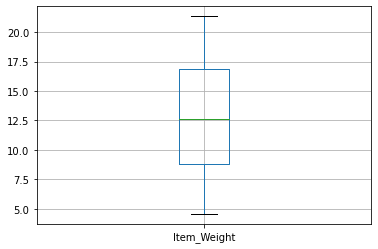

In [13]:
train.boxplot(column=['Item_Weight'])
#As we can see there are no outliers from the box plot
#Which leads to the conclusion that the mssing values can be replaced with the mean

In [14]:
#Imputatation of the missing values are done here
mean1 = train['Item_Weight'].mean()
train['Item_Weight'].replace(np.nan,mean1,inplace=True)

In [15]:
train.isnull().sum()
#Therefore the missing values in the Item_Weight column are removed

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
#since it is a categorical variable we replace it with mode 
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [17]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

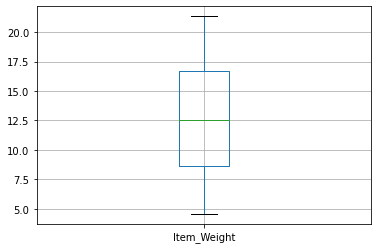

In [20]:
test.boxplot(column=['Item_Weight'])

In [21]:
duplicate = train.duplicated()
print(duplicate.sum())

0


In [22]:
#We can see that the fat content present here
#we have low fat labelled as LF and low fat , also Regular has an alias of reg , therefore to avoid this we need to make all the same 

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [24]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [26]:
miss_values = train['Outlet_Size'].isnull().sum()
miss_values

0

# 6) Univariate and bivariate analysis

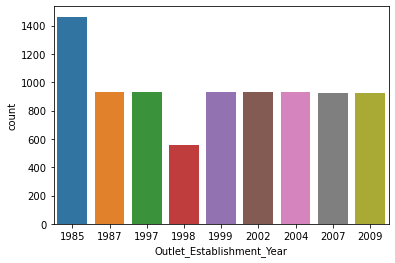

In [27]:
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()
#FROM this we can see there are a lot of stores established in the year 1985 and lowest in 1998 . And the rest remain nearly same

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

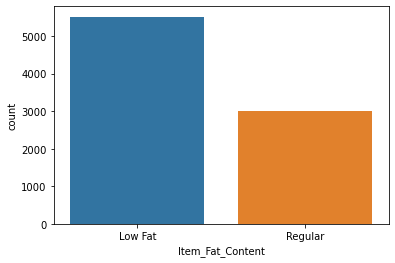

In [28]:
sns.countplot(x="Item_Fat_Content",data=train)
#As we identified that this had many alias names we changed and grouped them (done in the EDA part)

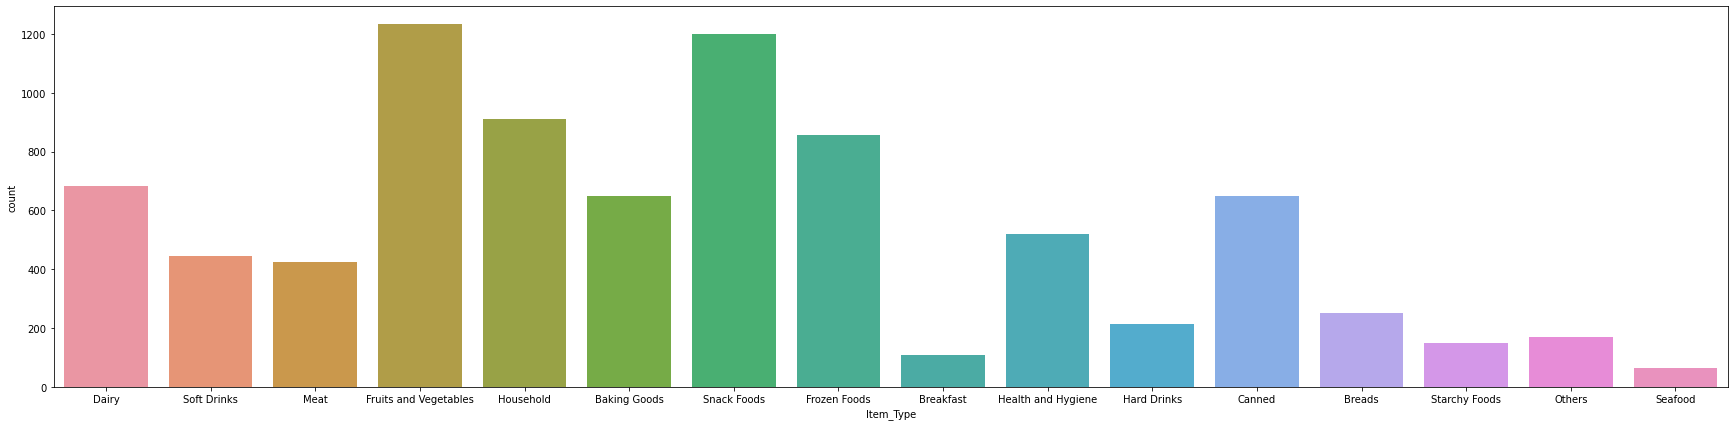

In [29]:
plt.figure(figsize=(30,7))
sns.countplot(x="Item_Type",data=train)
plt.show()
#From this we can coclude that the Fruits and vegetables , Snack foods constitute majority

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

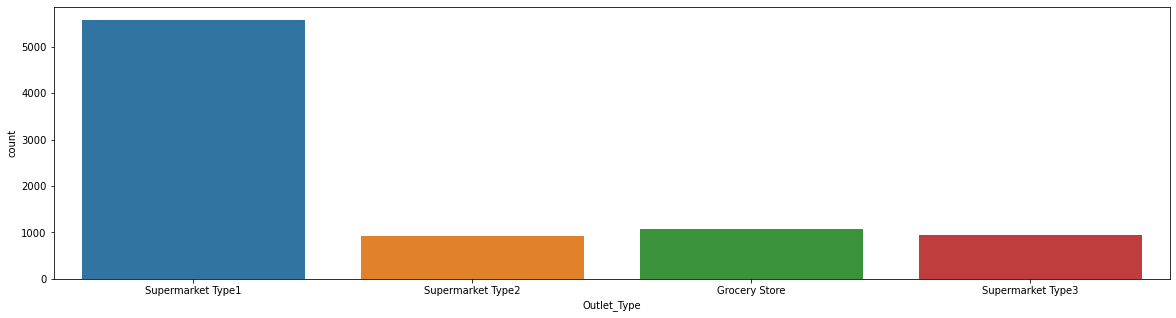

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(x="Outlet_Type",data=train)
#from this we can see that the Supermarket type 1 has most of the branches established

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

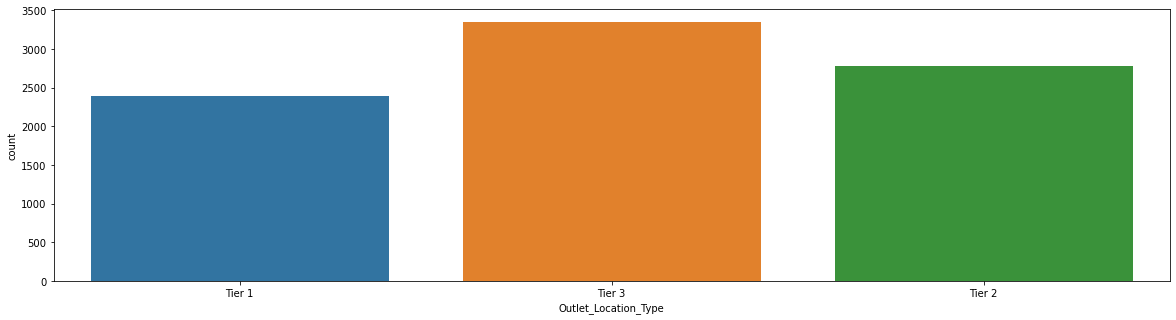

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(x="Outlet_Location_Type",data=train)
#tier 3 outlets are the more dominant among the location type followed by tier 2

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

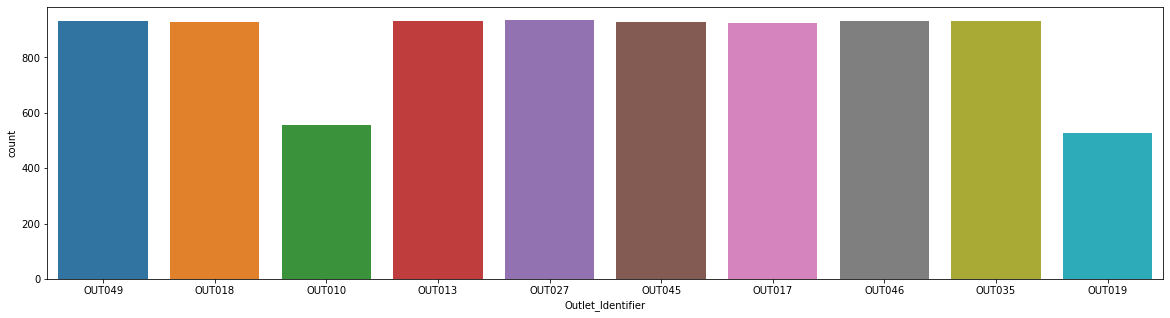

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(x="Outlet_Identifier",data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

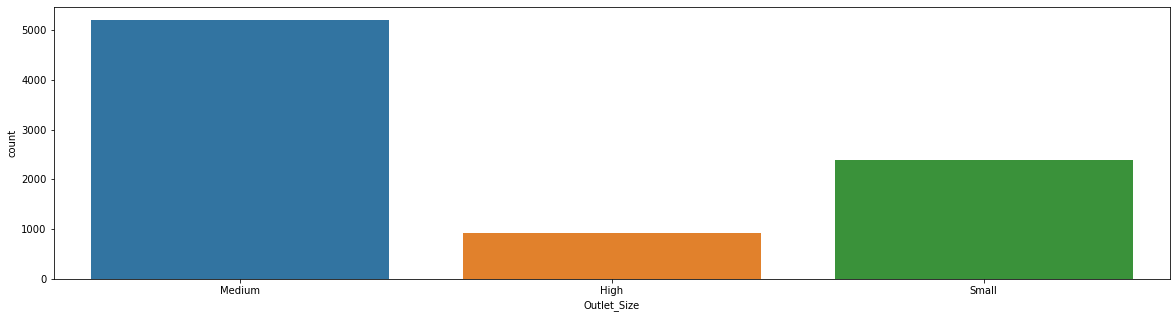

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(x="Outlet_Size",data=train)
#as we can see that the size of the outlet is majority of the outlets are of medium size.

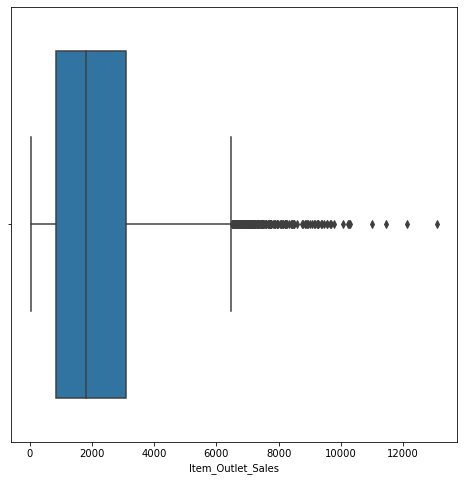

In [34]:
#From this we come to know that Item outlet sales contains outliers
#therefore we need to remove these outliers
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Outlet_Sales', data = train);

In [35]:
def removeoutliers(df,column):
  Q3=df[column].quantile(0.75)
  Q1=df[column].quantile(0.25)
  IQR=Q3-Q1
  upper=Q3+(1.5*IQR)
  lower=Q1-(1.5*IQR)
  df=df[(df[column]>lower)&(df[column]<upper)]
  return df

In [36]:
#We have removed the outliers in the Item_Outlet_sales column
train=removeoutliers(train,'Item_Outlet_Sales')

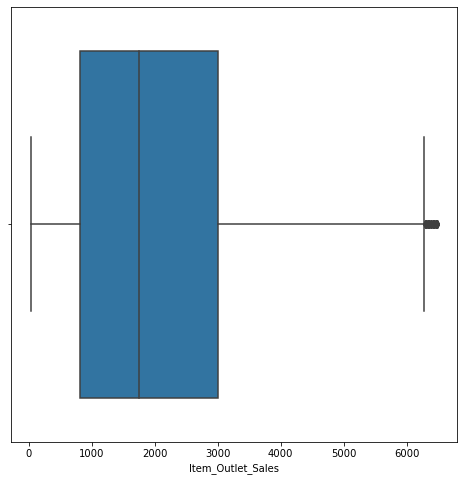

In [37]:
#After removal of outliers
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Outlet_Sales', data = train);

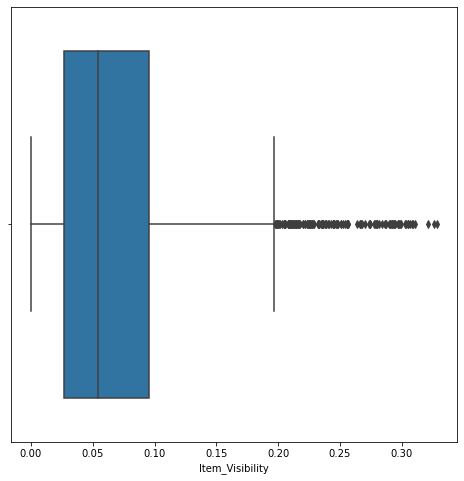

In [38]:
#We can see that the visibility also contains outliers and should be remove as above
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Visibility', data = train);

In [39]:
train=removeoutliers(train,'Item_Visibility')

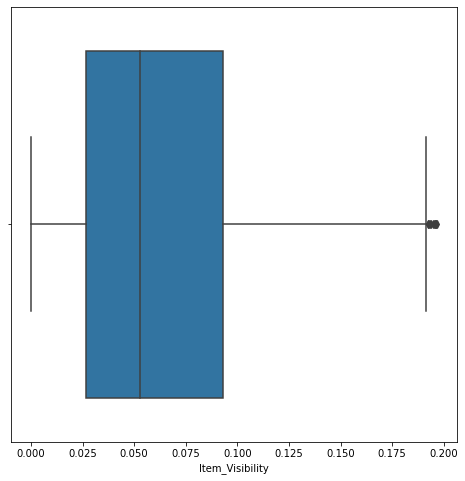

In [40]:
#after reoving outliers from Item_Visibility
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Visibility', data = train);

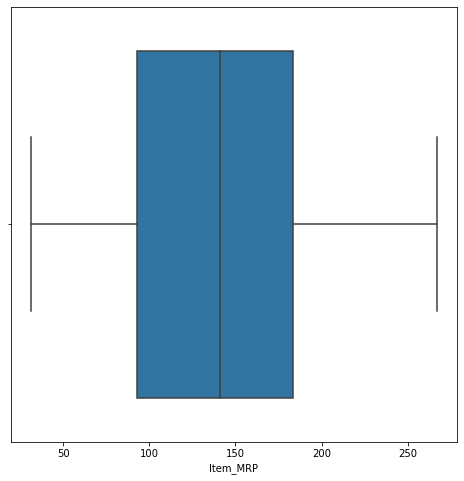

In [41]:
#No outliers are present
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_MRP', data = train);

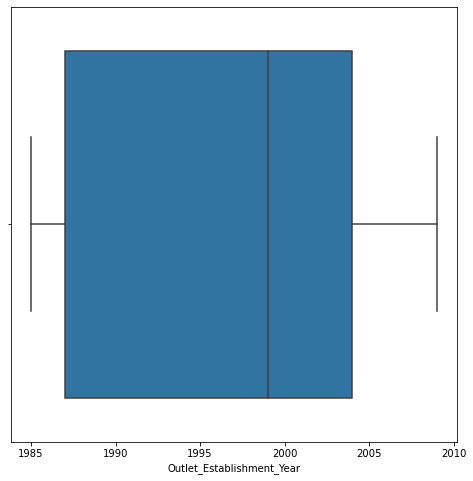

In [42]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Outlet_Establishment_Year', data = train);

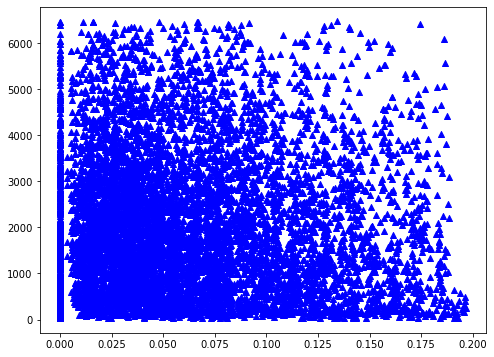

In [43]:
plt.figure(figsize =(8,6))
plt.scatter(  train['Item_Visibility'], train['Item_Outlet_Sales'],c='blue',marker="^")
#There is no linear relationship between these 2 variables

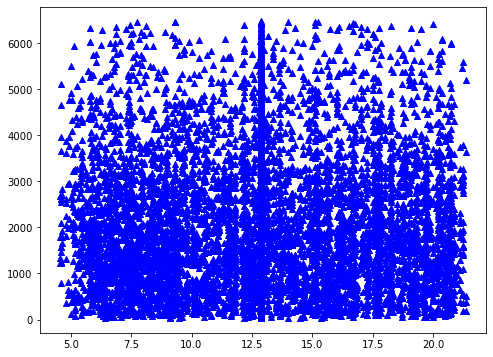

In [44]:
plt.figure(figsize =(8,6))
plt.scatter(  train['Item_Weight'], train['Item_Outlet_Sales'],c='blue',marker="^")
#similarly there is no linear relationship between these 2 varaibles

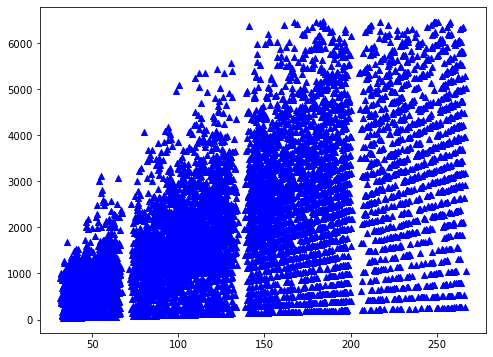

In [47]:
plt.figure(figsize =(8,6))
plt.scatter(  train['Item_MRP'], train['Item_Outlet_Sales'],c='blue',marker="^")
#somesort of a positive linear relationship exits here and due to the large amount of data we aren't able to tell correctly

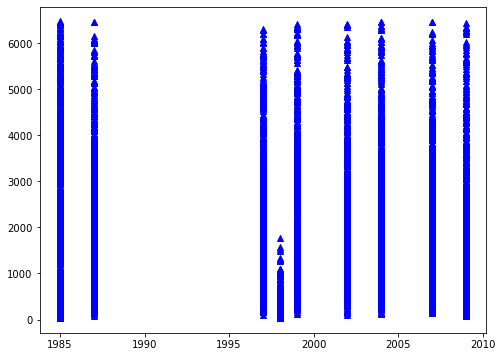

In [48]:
plt.figure(figsize =(8,6))
plt.scatter(  train['Outlet_Establishment_Year'], train['Item_Outlet_Sales'],c='blue',marker="^")

# 7) Label encoding of categorical variable is done here

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])

train['Item_Type'] = encoder.fit_transform(train['Item_Type'])

train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])

train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])

train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])

train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

In [52]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# 8) The column that doesnt contribute to the prediction is dropped

In [53]:
drop_columns = ['Outlet_Establishment_Year','Item_Identifier']
train.drop(drop_columns, axis =1 , inplace = True) 

In [54]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976


In [55]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [56]:
print(X)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0

In [57]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8196, dtype: float64


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6556, 9), (1640, 9), (6556,), (1640,))

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(8196, 9) (6556, 9) (1640, 9)


# 9) Model building

LINEAR REGRESSION

In [61]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = regressor.predict(X_test)

In [63]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,y_pred)))

R2 Score: 0.47469698730524035
Mean Squarred Error: 1154767.8126105377
RMSE: 1074.6012342308834
Mean Absolute Error : 828.7029376098133


In [64]:
y_pred

array([1320.17479233, 4780.31015869, 2351.23466882, ..., 3767.74683365,
       2113.81244398, 2093.07511356])

RANDOM FOREST

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
#hyperparameters are tuned
rf = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 47, min_samples_leaf = 10)

In [67]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=50,
                      random_state=47)

In [68]:
rf_pred = rf.predict(X_test)

In [69]:
print("R2 Score:", r2_score(y_test, rf_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, rf_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,rf_pred)))

R2 Score: 0.5663181632572791
Mean Squarred Error: 953357.9931613978
RMSE: 976.400529066529
Mean Absolute Error : 710.408790993538


XGBOOST

In [70]:
import sys
!{sys.executable} -m pip install xgboost

In [71]:
from xgboost import XGBRegressor
from sklearn import metrics
regressor = XGBRegressor()

In [72]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [73]:
data_prediction = regressor.predict(X_test)

In [74]:
print("R2 Score:", r2_score(y_test,data_prediction))
print("Mean Squarred Error:", mean_squared_error(y_test, data_prediction))
print("RMSE:", math.sqrt(mean_squared_error(y_test, data_prediction)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,data_prediction)))

R2 Score: 0.5157772486310044
Mean Squarred Error: 1064461.5277307539
RMSE: 1031.7274483751771
Mean Absolute Error : 747.0176541279028


In [75]:
from sklearn.linear_model import Lasso

In [76]:
ls = Lasso()
ls.fit(X_train, y_train)

Lasso()

In [77]:
lasso_pred = ls.predict(X_test)

In [78]:
print("R2 Score:", r2_score(y_test, lasso_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, lasso_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lasso_pred)))

R2 Score: 0.4747837640830812
Mean Squarred Error: 1154577.0521779666
RMSE: 1074.5124718578033
Mean Absolute Error : 828.6563557140316
